In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
def f(N,t,La=0.5,Lb=0.3):
    
    A,B,C=N
    
    dnadt=-La*A
    dnbdt=La*A-Lb*B
    dncdt = Lb*B
    return np.array([dnadt,dnbdt,dncdt])

In [3]:
t = np.linspace(0,10,50)
r0 = np.array([500,0,0])

In [4]:
sol = odeint(f, r0, t, args=(1.3,))
print(len(sol))

50


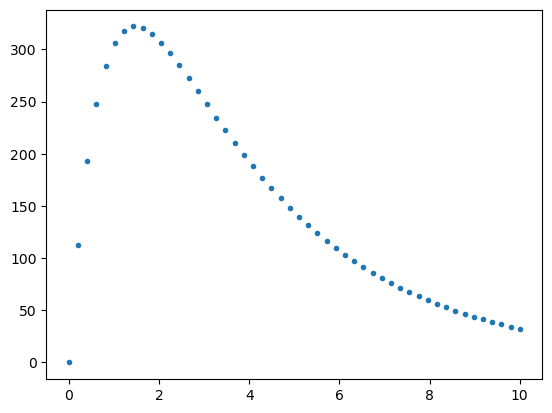

In [5]:
plt.scatter(t,sol[:,1],marker='.')

In [6]:
def Increment(f,r,t,h):
    
    state1 = np.array([r[0],r[1],r[2]])
    K1 = f(state1,t)
    
    state2 = np.array([r[0]+0.5*h*K1[0],r[1]+0.5*h*K1[1],r[2]+0.5*h*K1[2]])
    K2 = f(state2,t+0.5*h)
    
    state3 = np.array([r[0]+0.5*h*K2[0],r[1]+0.5*h*K2[1],r[2]+0.5*h*K2[2]])
    K3 = f(state3,t+0.5*h)
    
    state4 = np.array([r[0]+h*K3[0],r[1]+h*K3[1],r[2]+h*K3[2]])
    K4 = f(state4, t+h)
    
    Deltaf = h*(K1+2*K2+2*K3+K4)/6
    
    return r+Deltaf

In [7]:
def Adaptativo(f,r0,t,e=1e-4):
    
    h = t[1] - t[0]
    
    tf = t[-1]
    t = t[0]
    
    r = r0
    
    Time = np.array([t])
    Vector = r
    
    Steps = np.array([h])

    
    
    while t < tf:
        
        r1 = Increment(f,r,t,h)
        r2 = Increment(f,r1,t+h,h)
        rt = Increment(f,r,t,2*h)
        
       
        error = np.linalg.norm( r2 - rt )

        if error< e:
            
            
            t+=2*h
            r=rt
            
            #r = Increment(f,r,t,h)
            
            Steps = np.append(Steps,h)
            Time = np.append(Time,t)
            Vector = np.vstack((Vector,r))
            
            
  
        q= 0.85*((e/error)**(1/4))
            
        h=h*q
            
       
        
       
    return Time,Vector,Steps

In [12]:
t1,x1,h1 = Adaptativo(f,r0,t)

print("numero de pasos":len(h1))
mayor=0
posicion=0
for i in range(len(x1[:,1])):
    if x1[:,1][i]>mayor:
        mayor=x1[:,1][i]
        posicion=i
print("EL momento maximo de B es:",posicion, " C en el momento de max B",x1[:,2][posicion]," A en el momento de max B",x1[:,0][posicion])


38
EL momento maximo de B es: 13  C en el momento de max B 121.0784558565119  A en el momento de max B 146.7295259199198


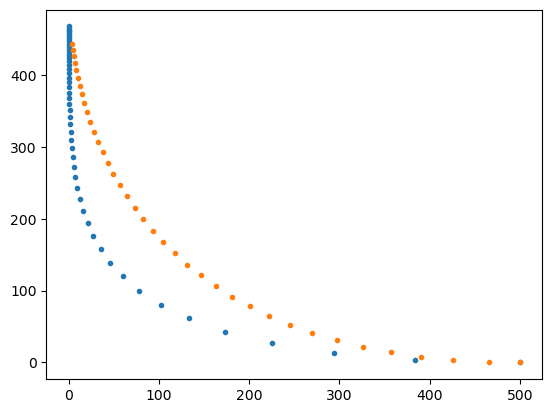

In [16]:
plt.scatter(sol[:,0],sol[:,2],marker='.')
plt.scatter(x1[:,0],x1[:,2],marker='.')
